<a href="https://colab.research.google.com/github/Ilmaj17/MaleFemaleClassifier/blob/main/MaleFemaleClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [574]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [575]:
df_train = pd.read_csv('/content/drive/MyDrive/Data Sets/MaleFemale_Training set.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Data Sets/MaleFemale_Test set.csv')

###Exploratory Data Analysis

In [576]:
df_train.head()

,Height,Weight,Sex
0,165.65,35.41,Female
1,148.53,74.45,Female
2,167.04,81.22,Male
3,161.54,71.47,Male
4,174.31,78.18,Male


In [577]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3000 non-null   float64
 1   Weight  3000 non-null   float64
 2   Sex     3000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 70.4+ KB


In [578]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  205 non-null    float64
 1   Weight  205 non-null    float64
 2   Sex     205 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.9+ KB


###Pipeline


*   Converting the categorical data of 'Sex' column to numerical data.
*   Normalizing the 'Height' and 'Weight' columns



In [579]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEncoder (BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    lb = LabelEncoder()
    X['Sex'] = lb.fit_transform(X['Sex'])
    return X

class FeatureScaler (BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    sc = MinMaxScaler()
    X['Height'] = sc.fit_transform(X[['Height']])
    X['Weight'] = sc.fit_transform(X[['Weight']])
    return X

In [580]:
pipe = Pipeline([("encoder", FeatureEncoder()), ("scaler", FeatureScaler())])
from sklearn import set_config
set_config()
pipe

Pipeline(steps=[('encoder', FeatureEncoder()), ('scaler', FeatureScaler())])

In [581]:
df_train = pipe.fit_transform(df_train)
df_test = pipe.fit_transform(df_test)
df_train = pd.DataFrame(df_train)
df_train.head()

,Height,Weight,Sex
0,0.046281,0.056415,0
1,0.040621,0.138351,0
2,0.046741,0.152559,1
3,0.044922,0.132096,1
4,0.049145,0.146179,1


In [582]:
sc = MinMaxScaler()
df_train['Height'] = sc.fit_transform(df_train[['Height']])
df_train.head()


,Height,Weight,Sex
0,0.046281,0.056415,0
1,0.040621,0.138351,0
2,0.046741,0.152559,1
3,0.044922,0.132096,1
4,0.049145,0.146179,1


In [583]:
#le = LabelEncoder()
#df_train['Sex'] = le.fit_transform(df_train['Sex'])
#df_test['Sex'] = le.fit_transform(df_test['Sex'])

In [584]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3000 non-null   float64
 1   Weight  3000 non-null   float64
 2   Sex     3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [585]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  205 non-null    float64
 1   Weight  205 non-null    float64
 2   Sex     205 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.9 KB


In [586]:
df_train.head()

,Height,Weight,Sex
0,0.046281,0.056415,0
1,0.040621,0.138351,0
2,0.046741,0.152559,1
3,0.044922,0.132096,1
4,0.049145,0.146179,1


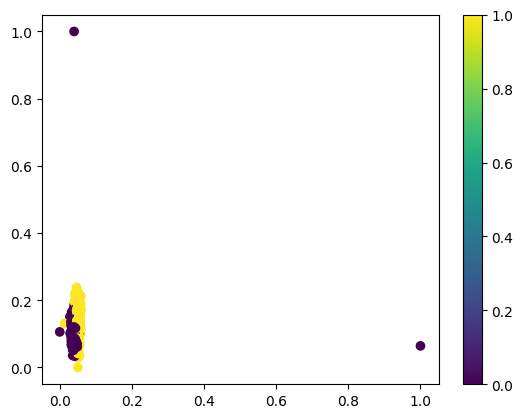

In [587]:
plt.scatter(df_train['Height'], df_train['Weight'], c=df_train['Sex'])
plt.colorbar()
plt.show()

###Split the Datasets

In [588]:
X_train = df_train.drop(columns = ['Sex'])
y_train = df_train.drop(columns = ['Height' ,'Weight'])
X_train.head()

,Height,Weight
0,0.046281,0.056415
1,0.040621,0.138351
2,0.046741,0.152559
3,0.044922,0.132096
4,0.049145,0.146179


In [589]:
y_train.head()

,Sex
0,0
1,0
2,1
3,1
4,1


In [590]:
X_test = df_test.drop(columns = ['Sex'])
y_test = df_test.drop(columns = ['Height' ,'Weight'])
X_test.head()

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [591]:
#scaler = MinMaxScaler()
#X_test = scaler.fit_transform(X_test)
#X_train = scaler.fit_transform(X_train)

###Build the Neural Network Architecture

In [592]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 280, input_shape = (2,), activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 280, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 280, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [593]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 280)               840       
                                                                 
 dense_41 (Dense)            (None, 280)               78680     
                                                                 
 dense_42 (Dense)            (None, 280)               78680     
                                                                 
 dense_43 (Dense)            (None, 1)                 281       
                                                                 
Total params: 158481 (619.07 KB)
Trainable params: 158481 (619.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###Compile the model

In [594]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ['accuracy'])

###Train the model

In [595]:
train = model.fit(X_train, y_train, epochs = 20, batch_size = 600)

Epoch 1/20
5/5 [==============================] - 1s 16ms/step - loss: 0.6891 - accuracy: 0.5073
Epoch 2/20
5/5 [==============================] - 0s 16ms/step - loss: 0.6710 - accuracy: 0.5777
Epoch 3/20
5/5 [==============================] - 0s 16ms/step - loss: 0.6496 - accuracy: 0.6180
Epoch 4/20
5/5 [==============================] - 0s 16ms/step - loss: 0.6094 - accuracy: 0.6753
Epoch 5/20
5/5 [==============================] - 0s 16ms/step - loss: 0.5887 - accuracy: 0.6950
Epoch 6/20
5/5 [==============================] - 0s 17ms/step - loss: 0.5699 - accuracy: 0.7120
Epoch 7/20
5/5 [==============================] - 0s 16ms/step - loss: 0.5605 - accuracy: 0.7247
Epoch 8/20
5/5 [==============================] - 0s 16ms/step - loss: 0.5868 - accuracy: 0.6893
Epoch 9/20
5/5 [==============================] - 0s 16ms/step - loss: 0.5598 - accuracy: 0.7103
Epoch 10/20
5/5 [==============================] - 0s 15ms/step - loss: 0.5477 - accuracy: 0.7203
Epoch 11/20
5/5 [============

###Evaluate the model

<Axes: >

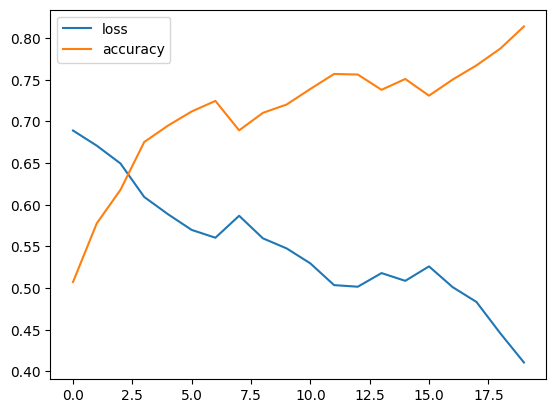

In [596]:
pd.DataFrame(train.history).plot()

In [597]:
model.evaluate(X_train, y_train)

94/94 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8277


[0.39212191104888916, 0.8276666402816772]

In [598]:
y_pred = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred >= 0.5).astype(int)
y_pred = pd.DataFrame(y_pred)
y_pred.head()

7/7 [==============================] - 0s 2ms/step


,0
0,1
1,0
2,0
3,0
4,1


In [599]:
#y = pd.DataFrame(y_pred_int)
#y.head()

In [600]:
y_test.head()

,Sex
0,0
1,1
2,1
3,1
4,0
